# Introduction

Throughout my data science journey, I have learned that it is a good practice to understand the data first and try to gather as many insights from it. Exploratory Data Analysis (EDA) is all about making sense of data in hand, before getting dirty with machine learning and sophiticated algorithm. 

While there are plenty of Python libraries that can help create beautiful and complex visualizations, I often find myself starting with the most simplistic analyses: count plot, histogram, scatter plot, boxplot, etc. This initial EDA workflow is very similar for each new data set. But unfortunately, they are tedious. Converting to correct data types, selecting the right variable type for the right plot, itterate through all possible variable combinations, adjusting plot asthetic and labels, etc. These are the tasks I would love to do... once. As someone that does not find great joy in completing repetitive tasks, I set out to build a tool that allow me to me as lazy as possible.

# Description
Auto_EDA is a python library that automates common tasks in your exploratory data analysis. This includes missing values visualization, missing values handling, variable types handling, predictive modeling and a variety of univariate and bivariate graphs. The goal is to provide a fast and effective tool for discovering insights, so you can quickly move on machine learning model.


# Table of Contents

## Descriptive Statistics

###  Dataset Overview

1. Number of variables

2. Number of observations

3. Memory usage

## Missing Values

1. Visualize missing values using heatmap

2. Suggestions for handling missing value

## Variable Types

1. Print out current data types from Pandas

2. Type conversion suggestions: 

 * String datetime -> datetime
 
 * Small interger (for example: boolean)  -> categorical type
 
 * String float -> float
 
 * Maximum cardinality (number of unique == number of observations) -> remove

## Visualization

### Univariate plots

1. Histogram (for numerical data)

2. Count plot (for categorical data)

3. World cloud (for text data)

### Bivariate plots 

User can specify a categorical column for grouping. 

1. Correlation plots (heat map and scatter plot): for numerical and numerical data
    * Principal Component Analysis

2. Box plots: for numerical and categorical data

3. Relative frequency plots: for categorical and categorical data
    * Correspondence Analysis

4. Trend plot (connected scatterplot): if timeseries data is present


### Statistical Modeling

User can specify a target variable for classification/regression task using Classification And Regression Tree (CART).

1. Classification Report (train on 75% of data, test on 25%)

2. Bar chart of relative feature importance

3. Decision tree visualization with Dtreeviz



In [1]:
from auto_eda import *

In [2]:
# Example dataset: air quality
# Testing datetime format and missing data handling
air_quality = pd.read_csv('datasets/AirQualityUCI_req.csv')
air_quality['Datetime'] = air_quality['Date'] + " " + air_quality['Time']
del air_quality['Date'], air_quality['Time']
air_quality['text_number'] = '3'
air_quality.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime,text_number
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,10/03/2004 18:00:00,3
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,10/03/2004 19:00:00,3
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,10/03/2004 20:00:00,3
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,10/03/2004 21:00:00,3
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,10/03/2004 22:00:00,3


In [3]:
# Example dataset: Adult Income
# Test: categorical data
income = pd.read_csv('datasets/adult.csv')
income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Example dataset: Adult Income
# Test: categorical data
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes['Outcome'] = np.where(diabetes['Outcome'] == 1, 'Heart Disease', 'No Heart Disease')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Heart Disease
1,1,85,66,29,0,26.6,0.351,31,No Heart Disease
2,8,183,64,0,0,23.3,0.672,32,Heart Disease
3,1,89,66,23,94,28.1,0.167,21,No Heart Disease
4,0,137,40,35,168,43.1,2.288,33,Heart Disease


In [5]:
# Example dataset: mtcars
# Test: categorical data
mtcars = pd.read_csv('datasets/mtcars.csv')

# Example dataset: edible mushroom classification
# Test: categorical data
mushroom = pd.read_csv('datasets/mushroom.csv')

# Example dataset: Heart Disease 
# Test: categorical data + numerical data
heart = pd.read_csv('datasets/heart.csv')

# Example dataset: California Housing 
# Test: regression
housing = pd.read_csv('datasets/housing.csv')

# Test: most
titanic = pd.read_csv('datasets/titanic.csv')
titanic['survived'] = np.where(titanic['survived'] == 1, 'survived', 'not-survived')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,survived,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,not-survived,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,not-survived,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,not-survived,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


## Dataset Overview



In [6]:
report = auto_eda(titanic, target_variable = 'survived')

In [7]:
report.get_samples()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,survived,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,not-survived,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
1148,3,not-survived,"Rintamaki, Mr. Matti",male,35,0,0,STON/O 2. 3101273,7.125,?,S,?,?,?
1049,3,survived,"Nakid, Mr. Sahid",male,20,1,1,2653,15.7417,?,C,C,?,?
982,3,not-survived,"Lyntakoff, Mr. Stanko",male,?,0,0,349235,7.8958,?,S,?,?,?
1306,3,not-survived,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,not-survived,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?
1308,3,not-survived,"Zimmerman, Mr. Leo",male,29,0,0,315082,7.875,?,S,?,?,?


In [8]:
report.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   object
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(3), object(11)
memory usage: 143.3+ KB


In [9]:
report.get_overview()

Number of Variables: 1309
Number of Observations: 14
Memory Usage: 0.95998 Mb


## Missing Values

<Figure size 432x288 with 0 Axes>

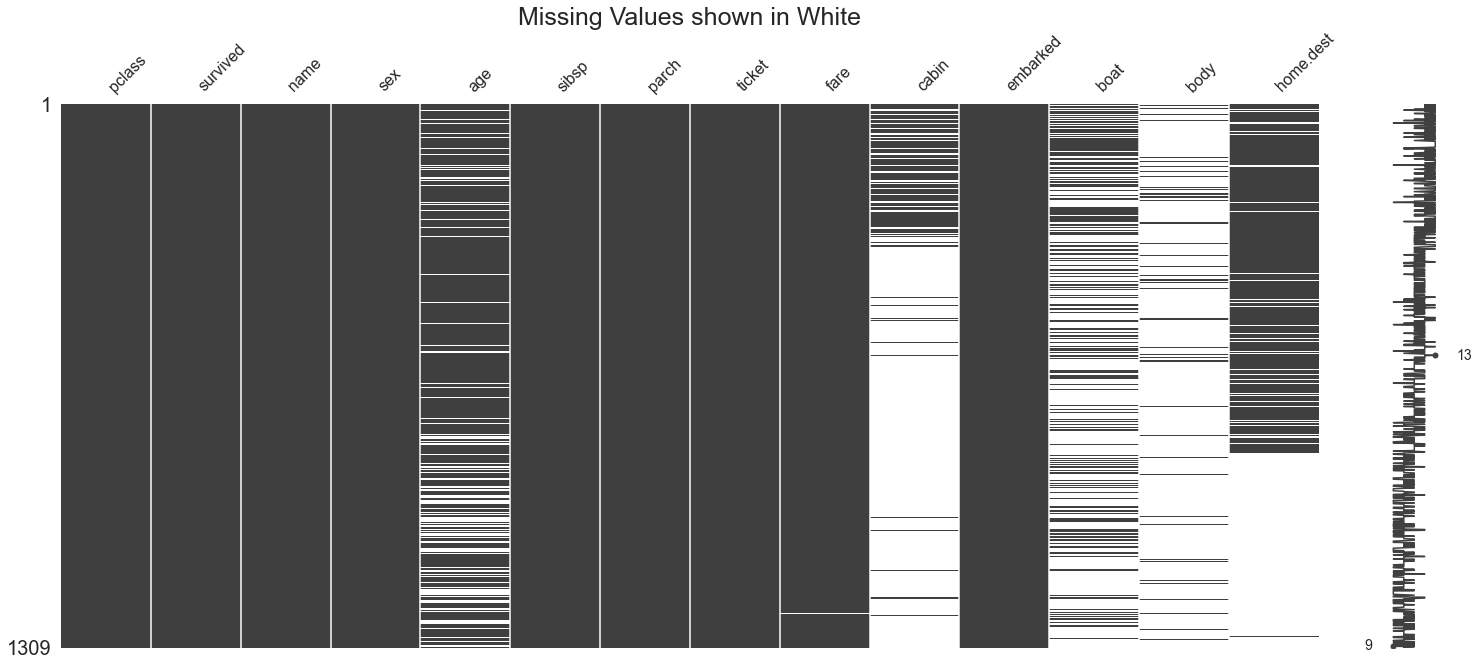

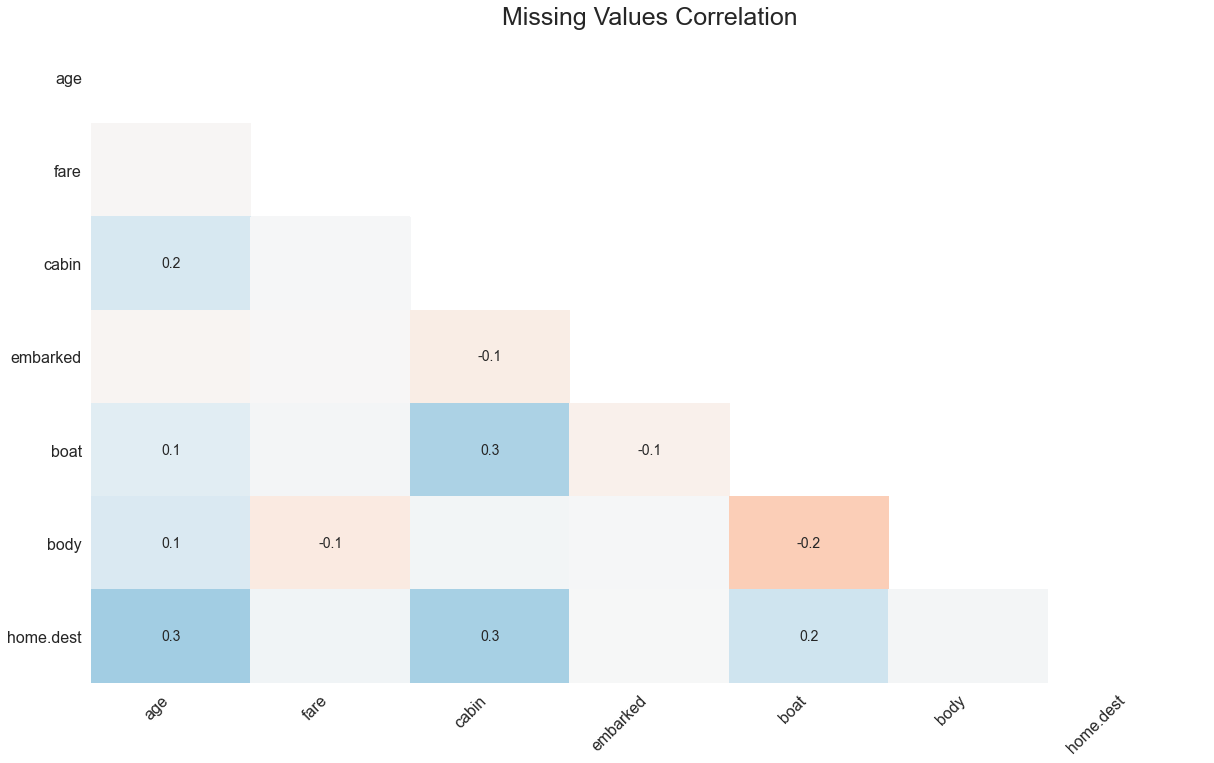

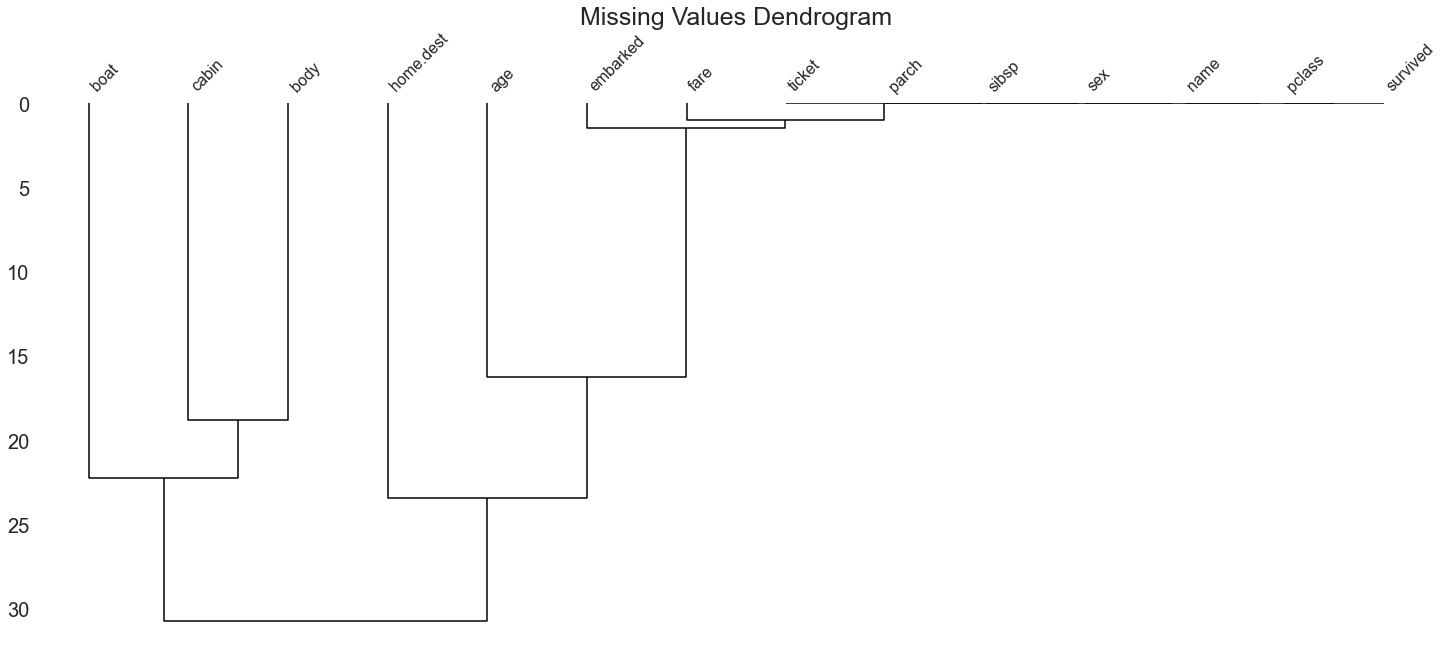

In [10]:
report.get_missings(missing_tag='?')

In [11]:
report.handle_missings(strategy = 'deletion', drop_threshold = 0.5)

Dropped columns: ['age', 'cabin', 'boat', 'body', 'home.dest']
Number of dropped rows: 3 --> 0.2% of rows removed


In [12]:
report.get_missings()

There is no missing value, please check if the missings have been encoded with non-NAN value.
Use argument missing_tag for encoded missing values


## Variable Types

In [13]:
report.check_data_type()

,Column,Type,Cardinality,Warning,Is_datetime,String_number,Suggest
0,pclass,int64,3,low_cardinality,no,yes,converts to object
1,survived,object,2,low_cardinality,no,no,None
2,name,object,1304,high_cardinality,no,no,None
3,sex,object,2,low_cardinality,no,no,None
4,sibsp,int64,7,low_cardinality,no,yes,converts to object
5,parch,int64,8,low_cardinality,no,yes,converts to object
6,ticket,object,927,high_cardinality,no,yes,None
7,fare,object,280,None,no,yes,converts to numeric
8,embarked,object,3,low_cardinality,no,no,None


In [14]:
report.change_data_type()

Column pclass converts to object
Column sibsp converts to object
Column parch converts to object
Column fare converts to numeric


In [15]:
report.check_data_type()

,Column,Type,Cardinality,Warning,Is_datetime,String_number,Suggest
0,pclass,object,3,low_cardinality,no,yes,None
1,survived,object,2,low_cardinality,no,no,None
2,name,object,1304,high_cardinality,no,no,None
3,sex,object,2,low_cardinality,no,no,None
4,sibsp,object,7,low_cardinality,no,yes,None
5,parch,object,8,low_cardinality,no,yes,None
6,ticket,object,927,high_cardinality,no,yes,None
7,fare,float64,280,None,no,yes,None
8,embarked,object,3,low_cardinality,no,no,None


## Visualization

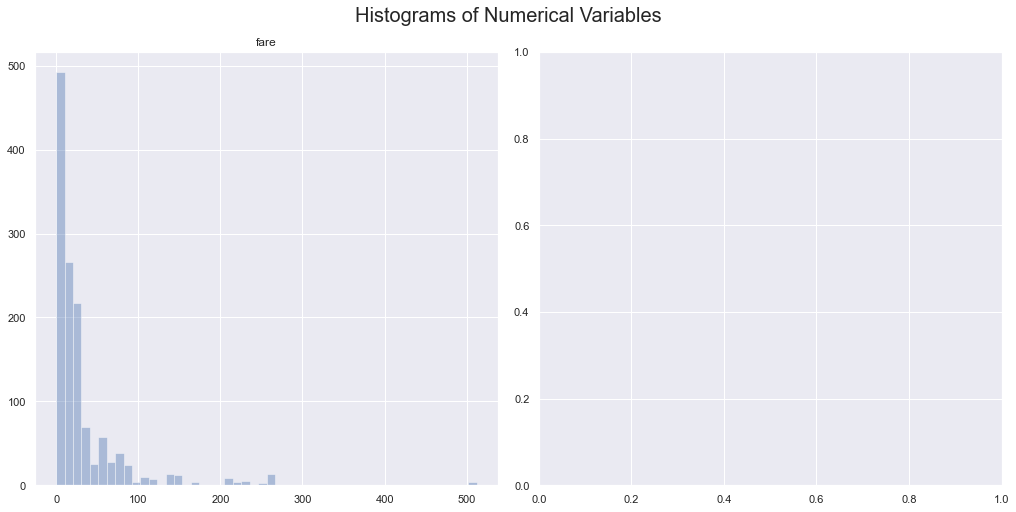

In [16]:
report.histogram()

Some categorical columns have high cardinality: ['name', 'ticket', 'fare']
Consider a different visualization method for these columns.


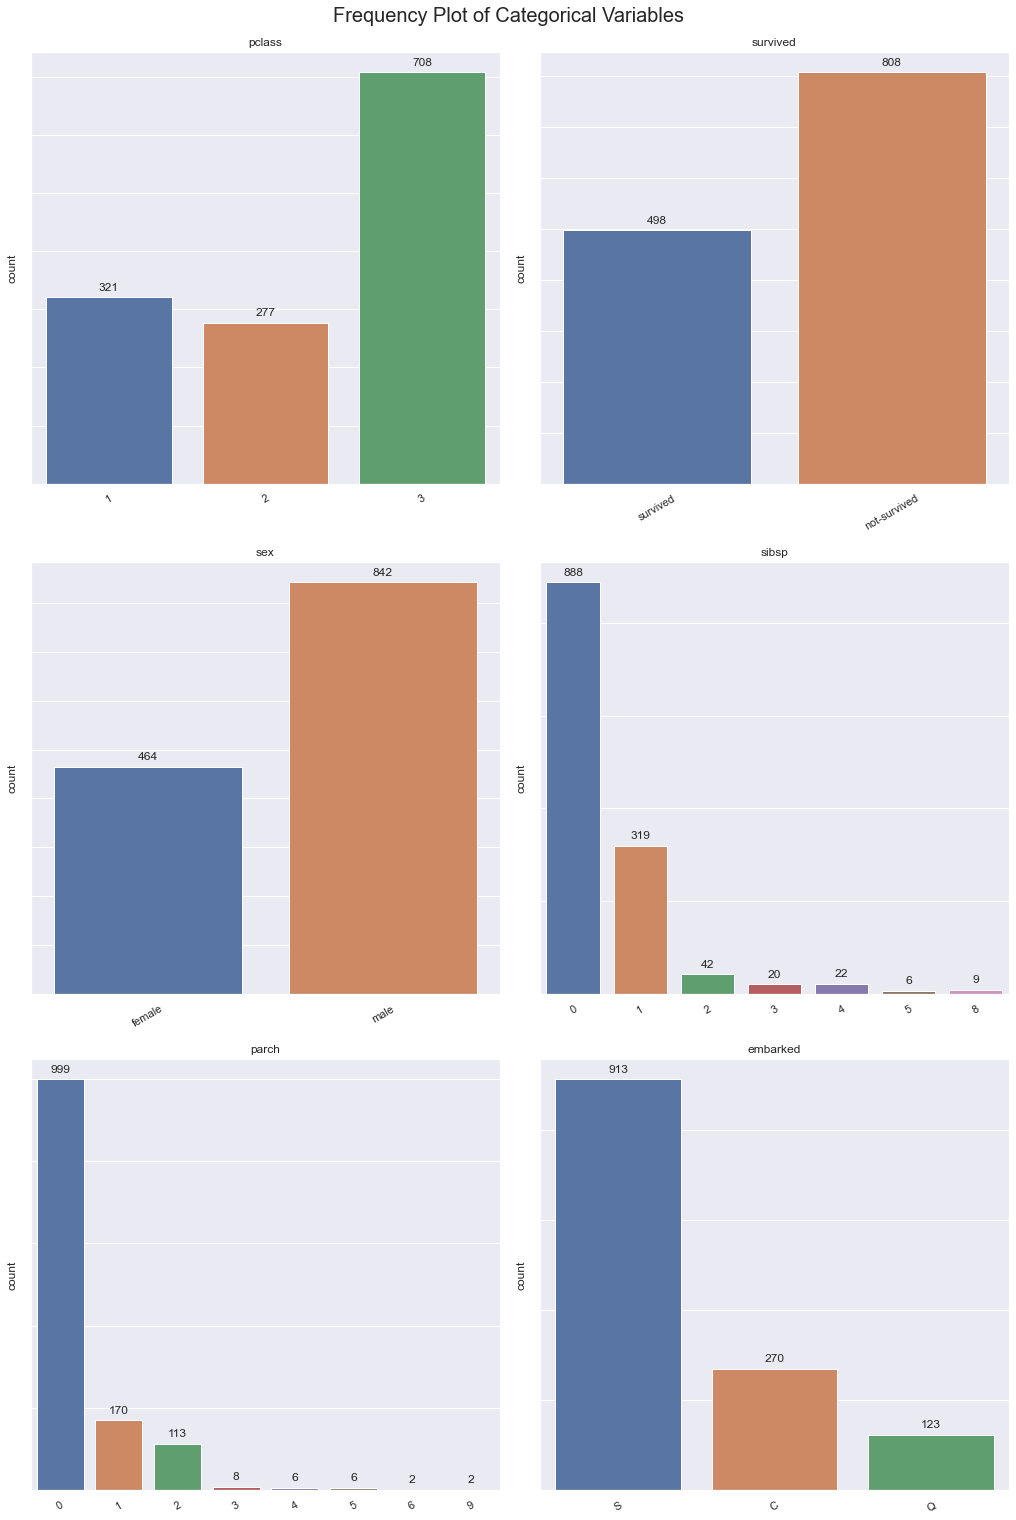

In [17]:
report.count_plots()

## Bivariate plots

### Correlation Plots

In [18]:
report.correlation()

Correlation plots requires at least 2 numerical variables


### PCA plot

In [19]:
report.pca()

PCA requires at least 3 numerical variables


### Boxplots

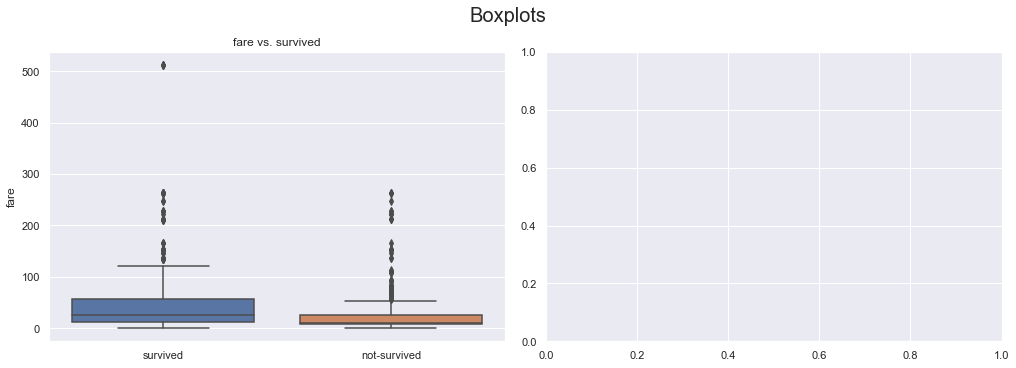

In [20]:
report.boxplots()

### Relative Frequency Plots

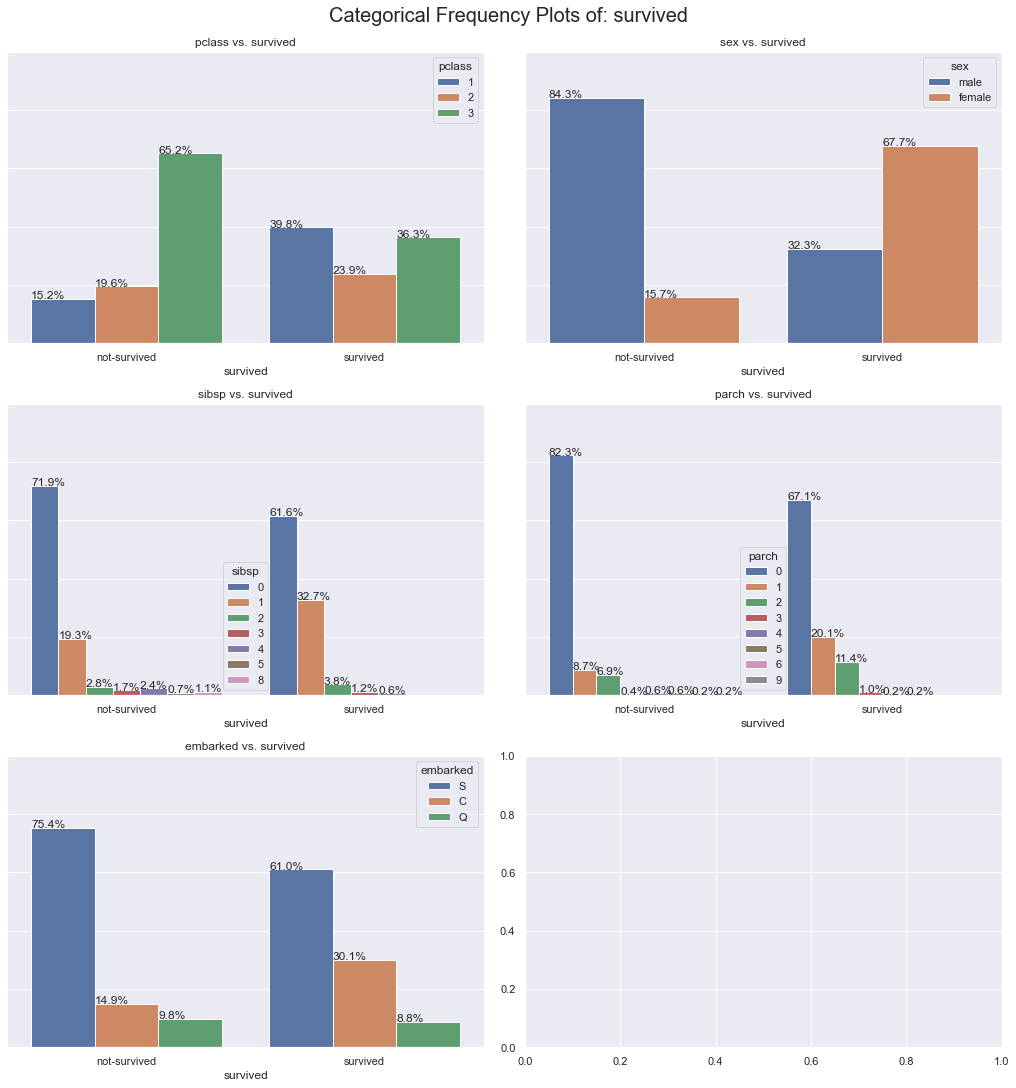

In [21]:
report.cat_plots()

### Timeseries plot 

In [22]:
report.timeseries_plots(grouper = 'M')

No datetime column detected. Make sure datetime64 type exist.


### Correspondence Analysis

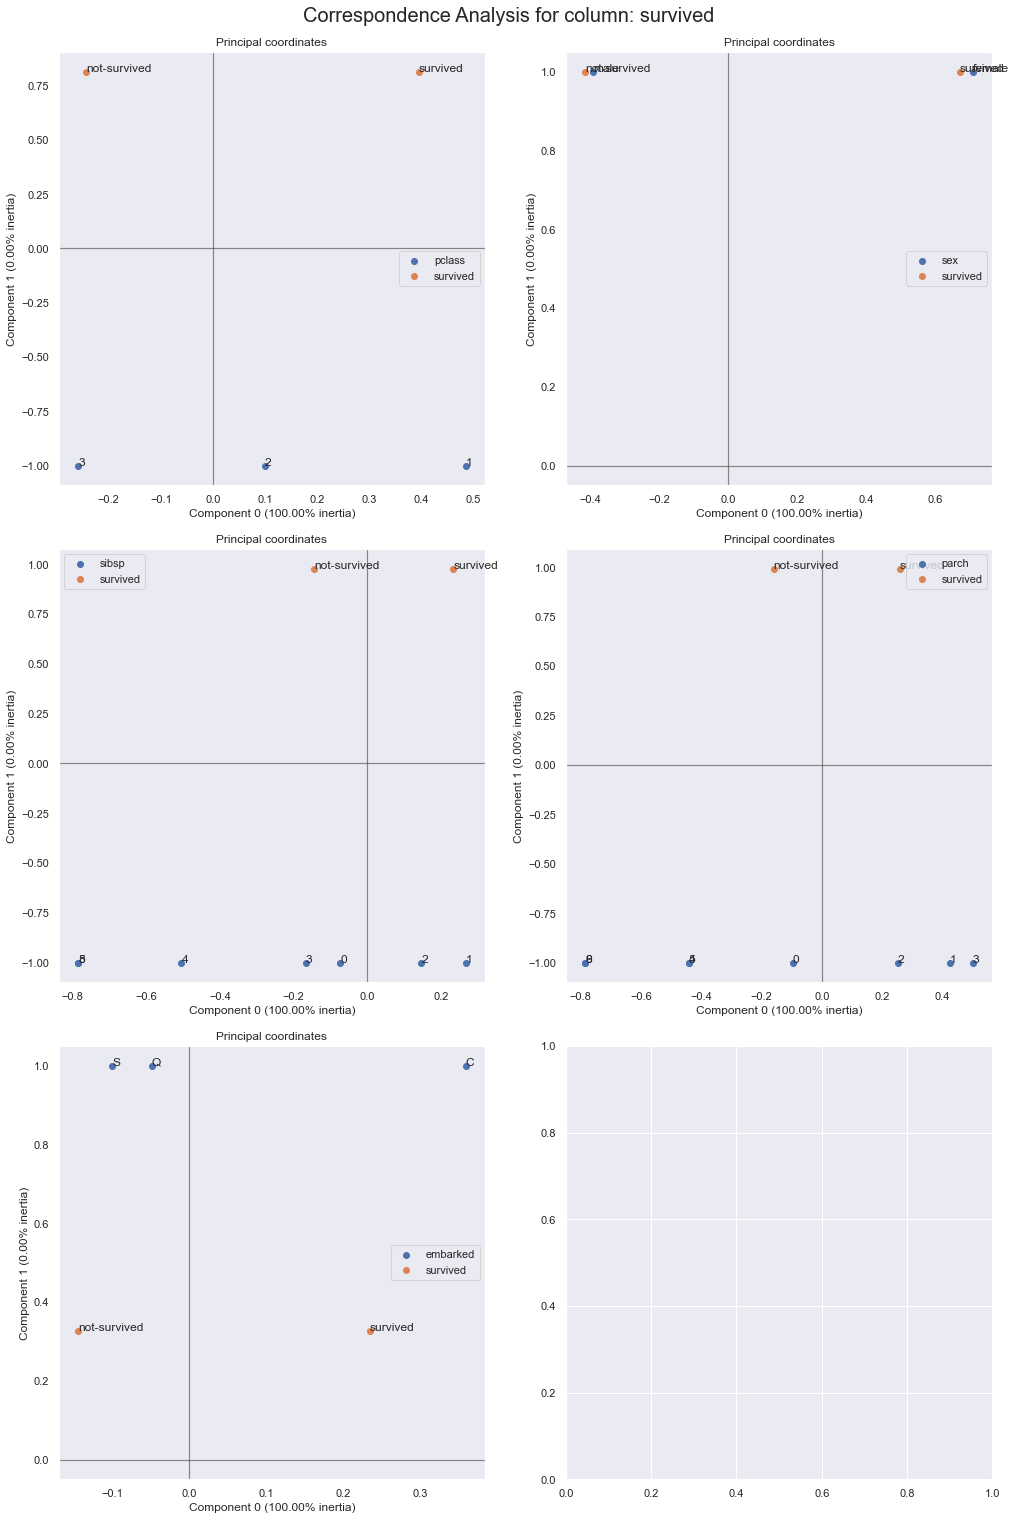

In [23]:
report.correspondence_analysis()

### Decision Tree Visualizer

Classification Report on 25% of Testing Data:
              precision    recall  f1-score   support

not-survived       0.76      0.86      0.81       198
    survived       0.74      0.59      0.66       129

    accuracy                           0.76       327
   macro avg       0.75      0.73      0.73       327
weighted avg       0.75      0.76      0.75       327



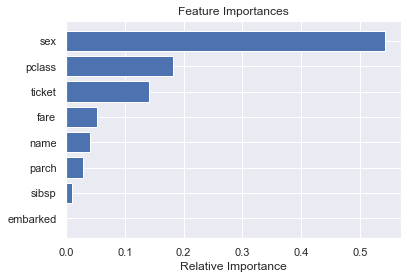

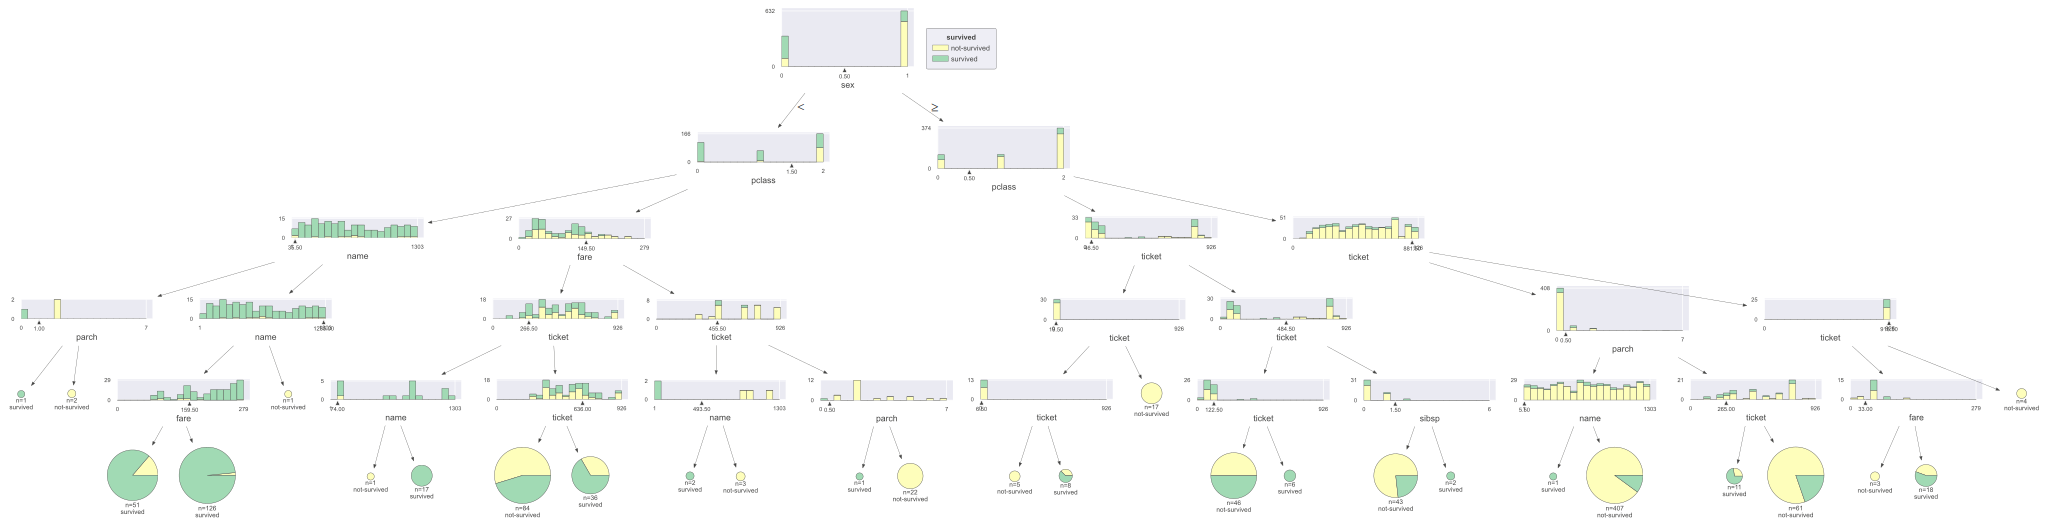

In [28]:
report.tree_model(max_depth = 5)